In [2]:
import pandas as pd 
import os 
import numpy as np
import json
import re

fp = os.path.join('data',
      'manual_sm_exports', 
     'Delaware_Employment_Equity_Project_Community_Workforce_Campaign_Survey_V7.csv')

df = pd.read_csv(fp)

In [432]:
## Open ended questions 
# certifications 
df_certs = df.filter(regex='certification')
df_certs['What certifications do you hold?'] = np.where(df['Do you hold any professional certifications?'] == 'No', 'No Certification', df_certs['What certifications do you hold?']) # fill nan but only for if 'No'
display(df_certs[df_certs['What certifications do you hold?'].isna()]) # two responses with unspecified certification
df_certs['What certifications do you hold?'] = df_certs['What certifications do you hold?'].fillna('Unknown')
df_certs = [df_certs['Do you hold any professional certifications?'] != 'Response']

# print(json.dumps({x:'' for x in df_certs[df_certs['Do you hold any professional certifications?'] == 'Yes']['What certifications do you hold?'].unique()}, indent=4))

/var/folders/qy/qp1k23kj0jj0bpkn10sx9mhh0000gn/T/ipykernel_14008/815703484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_certs['What certifications do you hold?'] = np.where(df['Do you hold any professional certifications?'] == 'No', 'No Certification', df_certs['What certifications do you hold?']) # fill nan but only for if 'No'


,Do you hold any professional certifications?,What certifications do you hold?
85,Yes,NaN
225,Yes,NaN


/var/folders/qy/qp1k23kj0jj0bpkn10sx9mhh0000gn/T/ipykernel_14008/815703484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_certs['What certifications do you hold?'] = df_certs['What certifications do you hold?'].fillna('Unknown')


In [433]:
## Many people are putting formal education in the certification category
cert_cats = {
    "Paraprofessional": "", # education
    "No Certification": "", # no certification 
    "Cooking certified": "", # food and hospitality 
    "Clerical": "", # business and management 
    "CDT, CCPR, AHC": "", # construction and vocational
    "Trauma Informed, CISM, PFA, MHFA": "", # medical and counseling
    "Net+, ic3, Microsoft Office Master": "", # IT and technical
    "Self Serve": "", # food and hospitality 
    "staff development": "", # business and management 
    "Certified Hospice and Palliative Care Administrator ": "", # medical and counseling 
    "COTA/L": "", # medical and counseling
    "Alcohol and drug prevention ": "", # medical and counseling 
    "Elementary Ed, Special Ed, Early Childhood, Elementary Guidance": "", # education
    "Ella Baker Leadership ": "", # leadership
    "Diversity, Equity, & Inclusion Certificate; Applied Positive Psychology Certificate": "",
    "Ingenieria industrial": "", # IT and technical
    "Business degree": "", # formal degree
    "Red card (Armed guard)": "", # 
    "Work certificate": "", # other
    "School Age Administrators, Early Childhood Assistant Teacher": "", # education
    "Master in Education": "", # education; formal degree
    "Estudios en Agricultura ": "", # formal degree 
    "CRCR, SHRM-SCP": "", # medical and counseling
    "IIA": "", # other
    "Office assistant ": "", # business and management
    "Cosmetology ": "", # cosmetology
    "LMSW": "", # medical and counseling
    "Crane operator": "", # construction and vocational
    "CNA, HHA": "", # medical and counseling
    "Cosmetologist ": "", # cosmetology
    "Marketing ": "", # business and management
    "Nationally certified counselor, certified substance abuse counselor, managed care professional ": "", # medical and counseling 
    "Unknown": "", # other
    "Spec ed": "", # education
    "Business ": "", # business and management
    "Bachelors": "", # formal degree
    "Registered Dietitian Nutritionist": "", # medical and counseling
    "Forklift ": "", # construction and vocational
    "Serv safe": "", # food and hospitality 
    "Teacher": "", # education
    "Small Unmanned Aircraft System Remote Pilot": "",
    "Project management professional": "", # business and management
    "CPRP": "", # medical and counseling
    "Property, Casualty, Life & Health Insuranc, Series 6, 63 & 65 for Investments, Mortgage Loan Originator; RICP and ChFC from the American College": "",
    "Cosmetology license ": "", # cosmetology
    "LCSW ": "", # medical and counseling
    "P.E.": "", # education
    "Professional HR Certification ": "", # business and management
    "SAS Advanced Programming": "", # IT & technical
    "Contractor license ": "", # construction and vocational
    "ServSafe": "", # food and hospitality 
    "ParaEducator": "", # education
    "Education K-8": "", # education
    "Safe Server": "", # food and hospitality 
    "Ece 2": "", # education
    "Certification in case management ": "", # medical and counseling 
    "Business, Chaplain ": "", # business and management; 
    "Non Profit Management ": "", # business and management
    "Executive Philanthropy": "", # business and management
    "Counseling ": "", # medical and counseling
    "Teaching": "", # education
    "Business technology": "", # IT & technical
    "CCCMA": "", # medical and counseling
    "CNA SOCIAL AND HUMAN SERVICES ": "", # medical and counseling
    "Many educational certifications ": "", # education
    "HHA / CPR": "", # medical and counseling
    "Trauma, CAFAS, Executive Leadership": "", # medical and counseling; ?
    "Delaware Advanced Teaching License": "", # education
    "Emotional Intelligence & Leadership cert": "", # leadership
    "Delaware Certified Paralegal": "", # paralegal
    "Paralegal ": "", # paralegal 
    "Teaching k-7": "", # education 
    "Teacher\u2019s Certification, Certified Quality Improvement Associate ": "", # education
    "Teacher certification ": "", # education
    "Hair stylist ": "", # cosmetology
    "Asbesto,flagger,forklift license": "", # construction and vocational
    "Data Entry": "", # IT & technical 
    "Cosmetology, Zumba Fitness": "", # cosmetology;
    "CPR first aide certified care giver certified assistant teacher ": "", # education
    "non-profit management certification": "",
    "HQS , case management , service coordination ": "", # medical and counseling
    "aPHR, CAPM": "", # medical and counseling
    "Database Certification": "", # IT & technical 
    "Haitian Creole Interpreter ": "", # 
    "Electrical ": "", # construction and vocational
    "Para-Educator certification ": "", # education
    "BS Education, Masters of Instruction ": "", # education; formal degree
    "Childcare, accounting, event planning ": "", # education; business and management
    "CNA": "", # medical and counseling
    "Autism and severe disabilities ": "", # medical and counseling
    "Commercial driving cdl": "", # construction and vocational
    "Leadership ": "", # leadership
    "Cda": "", # education
    "servsafe": "", # food and hospitality
    "Certified Nursing Assistant ": "", # medical and counseling
    "Manager certified ": "", # business and management
    "Barbershop liscend": "", # cosmetology
    "Project mgr": "", # business and management
    "Secondary English education ": "", # education
    "Project management ": "", # business and management
    "Nursing Assistance, BA Behavioral Science ": "", # medical and counseling; formal degree
    "Certified Nursing Assistant": "", # medical and counseling
    "CPR": "", # medical and counseling
    "Life guard certification ": "", # other
    "Ella Baker": "" # leadership
}

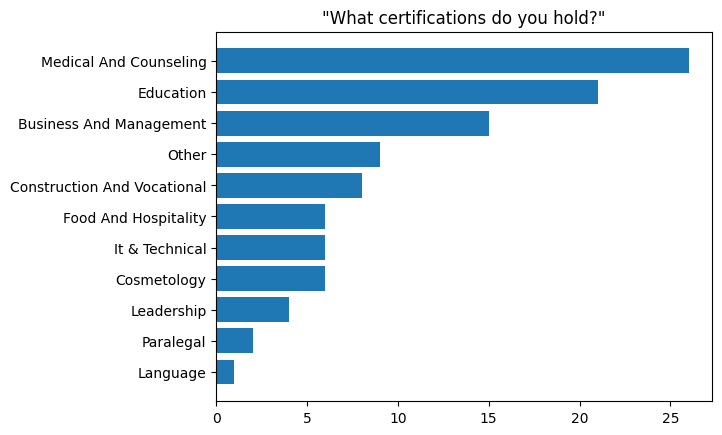

,Certification Type,count
0,Medical And Counseling,26
1,Education,21
2,Business And Management,15
3,Other,9
4,Construction And Vocational,8
5,Food And Hospitality,6
6,It & Technical,6
7,Cosmetology,6
8,Leadership,4
9,Paralegal,2


In [434]:
cert_cats_assigned = {
    "Paraprofessional": "education", 
    "No Certification": "no certification", 
    "Cooking certified": "food and hospitality",
    "Clerical": "business and management",
    "CDT, CCPR, AHC": "construction and vocational",
    "Trauma Informed, CISM, PFA, MHFA": "medical and counseling",
    "Net+, ic3, Microsoft Office Master": "IT and technical",
    "Self Serve": "food and hospitality",
    "staff development": "business and management",
    "Certified Hospice and Palliative Care Administrator ": "medical and counseling",
    "COTA/L": "medical and counseling",
    "Alcohol and drug prevention ": "medical and counseling",
    "Elementary Ed, Special Ed, Early Childhood, Elementary Guidance": "education",
    "Ella Baker Leadership ": "leadership",
    "Diversity, Equity, & Inclusion Certificate; Applied Positive Psychology Certificate": "medical and counseling",
    "Ingenieria industrial": "IT and technical",
    "Business degree": "business; formal degree",
    "Red card (Armed guard)": "other",
    "Work certificate": "other",
    "School Age Administrators, Early Childhood Assistant Teacher": "education",
    "Master in Education": "education; formal degree",
    "Estudios en Agricultura ": "other; formal degree",
    "CRCR, SHRM-SCP": "medical and counseling",
    "IIA": "other",
    "Office assistant ": "business and management",
    "Cosmetology ": "cosmetology",
    "LMSW": "medical and counseling",
    "Crane operator": "construction and vocational",
    "CNA, HHA": "medical and counseling",
    "Cosmetologist ": "cosmetology",
    "Marketing ": "business and management",
    "Nationally certified counselor, certified substance abuse counselor, managed care professional ": "medical and counseling",
    "Unknown": "other",
    "Spec ed": "education",
    "Business ": "business and management",
    "Bachelors": "other; formal degree",
    "Registered Dietitian Nutritionist": "medical and counseling",
    "Forklift ": "construction and vocational",
    "Serv safe": "food and hospitality",
    "Teacher": "education",
    "Small Unmanned Aircraft System Remote Pilot": "construction and vocational",
    "Project management professional": "business and management",
    "CPRP": "medical and counseling",
    "Property, Casualty, Life & Health Insuranc, Series 6, 63 & 65 for Investments, Mortgage Loan Originator; RICP and ChFC from the American College": "other",
    "Cosmetology license ": "cosmetology",
    "LCSW ": "medical and counseling",
    "P.E.": "education",
    "Professional HR Certification ": "business and management",
    "SAS Advanced Programming": "IT & technical",
    "Contractor license ": "construction and vocational",
    "ServSafe": "food and hospitality",
    "ParaEducator": "education",
    "Education K-8": "education",
    "Safe Server": "food and hospitality",
    "Ece 2": "education",
    "Certification in case management ": "medical and counseling",
    "Business, Chaplain ": "business and management",
    "Non Profit Management ": "business and management",
    "Executive Philanthropy": "business and management",
    "Counseling ": "medical and counseling",
    "Teaching": "education",
    "Business technology": "IT & technical",
    "CCCMA": "medical and counseling",
    "CNA SOCIAL AND HUMAN SERVICES ": "medical and counseling",
    "Many educational certifications ": "education",
    "HHA / CPR": "medical and counseling",
    "Trauma, CAFAS, Executive Leadership": "medical and counseling",
    "Delaware Advanced Teaching License": "education",
    "Emotional Intelligence & Leadership cert": "leadership",
    "Delaware Certified Paralegal": "paralegal",
    "Paralegal ": "paralegal",
    "Teaching k-7": "education",
    "Teacher\u2019s Certification, Certified Quality Improvement Associate ": "education",
    "Teacher certification ": "education",
    "Hair stylist ": "cosmetology",
    "Asbesto,flagger,forklift license": "construction and vocational",
    "Data Entry": "IT & technical",
    "Cosmetology, Zumba Fitness": "cosmetology",
    "CPR first aide certified care giver certified assistant teacher ": "education",
    "non-profit management certification": "business and management",
    "HQS , case management , service coordination ": "medical and counseling",
    "aPHR, CAPM": "medical and counseling",
    "Database Certification": "IT & technical",
    "Haitian Creole Interpreter ": "language",
    "Electrical ": "construction and vocational",
    "Para-Educator certification ": "education",
    "BS Education, Masters of Instruction ": "education; formal degree",
    "Childcare, accounting, event planning ": "other",
    "CNA": "medical and counseling",
    "Autism and severe disabilities ": "medical and counseling",
    "Commercial driving cdl": "construction and vocational",
    "Leadership ": "leadership",
    "Cda": "education",
    "servsafe": "food and hospitality",
    "Certified Nursing Assistant ": "medical and counseling",
    "Manager certified ": "business and management",
    "Barbershop liscend": "cosmetology",
    "Project mgr": "business and management",
    "Secondary English education ": "education",
    "Project management ": "business and management",
    "Nursing Assistance, BA Behavioral Science ": "medical and counseling; formal degree",
    "Certified Nursing Assistant": "medical and counseling",
    "CPR": "medical and counseling",
    "Life guard certification ": "other",
    "Ella Baker": "leadership"
}

df_cert_cats = pd.DataFrame.from_dict(cert_cats_assigned, orient='index')\
    .reset_index()\
    .rename({'index':'given_cert', 0:'cert_type'}, axis=1)
# split where I have a semicolon
df_cert_cats['cert_type'].value_counts()

df_cert_cats['formal_degree'] = np.where(df_cert_cats['given_cert'].str.contains('degree'), True, False)
df_cert_cats['cert_type'] = df_cert_cats['cert_type'].apply(lambda x: re.sub(';|formal|degree', '', x).strip())
df_cert_cats['cert_type'] = df_cert_cats['cert_type'].apply(lambda x: re.sub(';|formal|degree', '', x).strip())
df_cert_cats['cert_type'] = df_cert_cats['cert_type'].replace({'IT and technical':'IT & technical', 'business':'business and management'})


v = df_cert_cats['cert_type'].value_counts().reset_index()
v['cert_type'] = v['cert_type'].str.title()
v.rename({'cert_type':'Certification Type'}, axis=1,inplace=True)
v = v[v['Certification Type'] != 'No Certification']

import matplotlib.pyplot as plt 
plt.barh(y=v['Certification Type'], width=v['count'])
plt.title('"What certifications do you hold?"')
# plt.xticks(rotation=90)
plt.gca().invert_yaxis()  # Invert the y-axis to start with the highest count at the top
plt.show()

display(v)

In [435]:
v['count'].sum()

104

In [436]:
## What skills would you like to develop 

df_skills = df.filter(regex='skills')
col = "What skills would you most like to develop?"
# print(json.dumps({x:'' for x in df_skills[col]}, indent=4))

In [437]:
desired_skill_cats = { 
    "Prioritizing, organization": "business and management", 
    "I could teach some things I have learned ": "none", # none 
    "Believe I have enough ": "none", # none
    "Just more of the business structure of things a lot of stuff I was not exposed to": "business and management",
    "Computer Skills": "IT & technical", 
    "computer": "IT & technical",
    "NaN": "none", # none 
    "Time Management": "business and management",
    "Management, Administration, Consulting": "business and management",
    "Computer coding": "IT & technical",
    "Interpersonal ": "communication and soft skills",
    "Don\u2019t have the time ": "none", # none 
    "Corporate skill set": "business and management", 
    "Business side and policy ": "business and management",
    "patience with todays work force": "communication and soft skills", 
    "Communication skills at all levels": "communication and soft skills", 
    "Running a big organization geared towards eating healthy and living healthy": "business and management", # business and management
    "Communication. ": "communication and soft skills",
    "Control de Calidad de productos no perecibles": "food and hospitality", # other 
    "How to find time to educate more people about starting a business ": "communication and soft skills", # business and management
    "Just talking to folks": "communication and soft skills",
    "Just people skills": "communication and soft skills",
    "Social ": "communication and soft skills",
    "Office skills": "communication and soft skills",
    "Public speaking ": "communication and soft skills", 
    "I feel I have the appropriate skills": "none", # none 
    "Reading and writing": "communication and soft skills",
    "Housekeeping ": "construction and vocational",
    "Quantitative Analyst": "IT & technical", #
    "Business ": "business and management", # business
    "Prepared ": "none", # none
    "How to help our youth understand credit ": "education", # 
    "Management skills": "business and management", # management
    "Communication skills ": "communication and soft skills",
    "Just teaching entrepreneurship ": "education",
    "Business plan ": "business and management", # business
    "Teamwork ": "communication and soft skills", # communication and soft skills 
    "Communication skills": "communication and soft skills",
    "Business side of things": "", # business
    "Patience ": "", # communication and soft skills 
    "How to operate a crane": "", # construction and vocational
    "More of finances": "", # business
    "How to operate big businesses on a financial level": "", # business and management
    "Not sure": "", # other
    "Unsure": "", # other
    "entrepreneur ": "", # business
    "Public Speaking": "", # communication and soft skills 
    "Business side of restaurant business ": "", # food and hospitality
    "Really how to master vocational trainings": "", # construction and vocational
    "People ": "", # communication and soft skills 
    "Social skills": "", # communication and soft skills 
    "Business advancement ": "", # business
    "Interpersonal skills ": "", # communication and soft skills 
    "RN training / courses ": "", # medical and counseling
    "Probably technology ": "", # IT & technical
    "Teamwork  Communication   Time management ": "", # communication and soft skills;
    "Business prep and Management skills ": "", # business and management
    "conflict resolution": "", # communication and soft skills 
    "Social Skills": "", # communication and soft skills 
    "Home Health": "", # medical counseling
    "How to get more creative with most of the curriculums and reading comprehension being utilized in today\u2019s classroom ": "", # education
    "To improve my computer  skills.": "", # IT & technical 
    "None ": "", # none
    "More social skills": "", # communication and soft skills 
    "Computer ": "", # IT & technical
    "Adaptive ": "", #  other
    "Maybe management ": "", # business and management
    "Leadership ": "", # leadership
    "Housing": "", # non-professional
    "Communication skills and computer skills ": "", # communication and soft skills; IT & technical 
    "All of what I can learn": "", # other
    "Better my customer service skill or acquire skill in accounting.": "", # business and management
    "Better ways to communicate with parents": "", # communication and soft skills 
    "Business management skills": "", # business and management
    "Management and people\u2019s skills": "", # communication and soft skills 
    "Just better understand people with patience": "", # communication and soft skills 
    "Business building skills ": "", # business and management
    "Communication and better leadership": "", # communication and soft skills 
    "Budgeting, time management, price proposals and client communication. ": "", # business and management
    "Interpersal": "", # communication and soft skills 
    "Cognitive and counseling ": "", # medical and counseling
    "Strategic planning ": "", # business and management
    "Project management skills": "", # business and management
    "I would like to learn more of the practical skills required for library work as well as more computer skills that can help me help others better. ": "", # IT & technical; library
    "my fishing skills": "", # non-professional
    "How to be a boss": "", # business and management
    "Motivational speaker helping impoverished communities ": "", # communication and soft skills
    "Businesses management ": "", # business and management
    "Technical library skills": "", # IT & technical 
    "Leadership and management skills": "", # business and management
    "Cross cultural ": "", # communication and soft skills
    "Skills in the medical Field phlebotomy,medical terminology, anatomy physiology. Trading for a variety of skills in the medical field.": "",
    "Getting a cdl driver license": "", # construction and vocational
    "Construction ": "", # construction and vocational
    "Communication And Fast Pace": "", # communication and soft skills;
    "Computer knowledge ": "", # IT & technical
    "How to help children that have anger issues. ": "", # medical and counseling
    "Financial literacy,": "", # non-professional
    "What more can I do to better myself for the individuals I work with ": "",
    "Computer skills ": "", # IT & technical
    "English language ": "", # language 
    "Excel  Leadership  Team Building": "", # IT & technical; leadership; communication and soft skills
    "Community resources   Legal": "", # other
    "Teknik wendouz": "", # other 
    "CNA": "", # medical and counseling
    "Entrepreneur": "", # business and management
    "Management ": "", # business and management
    "N/a": "", # none
    "Contruction  ": "", # construction and vocational
    "WordPress power point  excel": "", # IT & technical 
    "Being open and more understanding to people\u2019s lives     ": "",
    "Microsoft Suite": "", # IT & techincal
    "Computer and writing skills ": "", # IT & technical 
    "Interpersonal,hospitality ": "", # communication and soft skills; food and hospitality
    "Hard working ": "", # other 
    "Not sure. I need to think about this ": "", # none
    "Communication": "", # communication and soft skills 
    "Being better organized ": "", # business and management
    "Social/counseling ": "", # communication and soft skills 
    "My computer skills": "", # IT & technical 
    "Criminal justices ": "", # non-professional
    "I would learn to learn a lot of new things ": "", # other
    "Typing ": "", # IT & techincal 
    "Coping skills and leadership skills ": "", # non-professional  
    "IT": "", # IT & technical
    "Computer tech": "", # IT & technical
    "None at this time": "", # none
    "Communication and networking ": "", # communication and soft skills 
    "Health care field ": "", # medical and counseling 
    "EDI, Mediation": "", #  medical and counseling
    "I would like to most develop my skills in marketing, editing, and customer engagement/experience.": "", # communication and soft skills
    "Operational": "", # business and management 
    "Better public speaking ": "", # communication and soft skills 
    "Business or medical billing ": "", # business and management
    "Life coach certification ": "", # other
    "Communication ": "", # communication and soft skills 
    "Don\u2019t know": "", # none
    "Peer counseling ": "", # medical and counseling
    "Leadership": "", # leadership
    "All of them.": "", # other 
    "Artificial intelligence in education training ": "", # education
    "Industrial skills": "", # construction and vocational
    "Management skills ": "", # business and management 
    "Self sklls": "", # non-professional 
    "More trading in food and beverage ": "", # food and hospitality 
    "Consulting ": "", # business and management
    "Taking risk skills\u2026 ": "", # other 
    "More digital media workshops ": "", # IT & technical
    "Financial stability ": "", # non-professional  
    "Carpentry": "", # construction and vocational
    "Social/professionalism": "", # communication and soft skills 
    "Analytical ": "", # other
    "More business analytical skills": "", # business and management
    "bookkeeping; improve on my QuickBooks knowledge": "business and management",
    "Better networking skills ": "", # communication and soft skills 
    "Sales": "", # business and management
    "Paralegal ": "", # paralegal
    "Teacher certification": "", # education
    "Out reach skills to better help my community ": "", 
    "Hvac": "", # construction and vocational
    "Billing and coding ": "",
    "AnyThing": "", # other 
    "I\u2019m not sure at the moment. ": "", # other 
    "Raising grandkids ": "", # non-professional
    "Networking, promoting and advertising, and professionalism ": "", # communication and soft skills
    "Phlebotomy ": "", # medical and counseling
    "Entrepreneurship and leadership ": "leadership", # 
    "Any ": "", # other 
    "Driving ": "", # non-professional
    "Social skills ": "", # communication and soft skills 
    "Computer": "", # IT & technical 
    "Computer training do i can do better at present job": "", # IT & technical 
    "How to drive a semi truck ": "", # construction and vocational
    "Computer troubleshooting and IT": "", # construction and vocational
    "Setting me up so I could attend school ": "", # other
    "Parenting grandkids": "", # non-professional
    "Anything that will upgrade my experience in life": "", # other 
    "entrepreneurship ": "", # leadership
    "General field experience ": "", # other 
    "Any skill": "", # other 
    "CULTURAL COMPETENCE  ADVOCY": "", # communication and soft skills 
    "Communications skills  soft and hard skills  public speaking skills  skills related to a career(medical field)": "", # communication and soft skills 
    "Customer service and any other skills I would need to perform my job well (I'm looking into working in a restaurant).": "", # communication and soft skills; food and hospitality 
    "none": "", # none 
    "Finance": "", # business and management
    "All I really want to further develop are my social skills, but I've been working through that myself.": "", # communication and soft-skills 
    "I'm not sure": "", # other
    "Efficiency": "", # other
    "Learn how to manage taxes and conserve cash": "", # non-professional
    "Better social skills": "",  # communication and soft skills 
    "Currently knowledge since I\u2019m still in high school.  Maybe later, some sort of trade": "", # other; construction and vocational
    "Making sure I can effectively incorporate my S.M.A.R.T goals  into my work place. ": "", # business and management
    "computer skills": "" # IT & technical 
}

In [438]:
desired_skill_cats_assigned = {
    "Prioritizing, organization": "business and management", 
    "I could teach some things I have learned ": "none", # none 
    "Believe I have enough ": "none", # none
    "Just more of the business structure of things a lot of stuff I was not exposed to": "business and management",
    "Computer Skills": "IT & technical", 
    "computer": "IT & technical",
    "NaN": "none", # none 
    "Time Management": "business and management",
    "Management, Administration, Consulting": "business and management",
    "Computer coding": "IT & technical",
    "Interpersonal ": "communication and soft skills",
    "Don\u2019t have the time ": "none", # none 
    "Corporate skill set": "business and management", 
    "Business side and policy ": "business and management",
    "patience with todays work force": "communication and soft skills", 
    "Communication skills at all levels": "communication and soft skills", 
    "Running a big organization geared towards eating healthy and living healthy": "business and management", # business and management
    "Communication. ": "communication and soft skills",
    "Control de Calidad de productos no perecibles": "food and hospitality", # other 
    "How to find time to educate more people about starting a business ": "communication and soft skills", # business and management
    "Just talking to folks": "communication and soft skills",
    "Just people skills": "communication and soft skills",
    "Social ": "communication and soft skills",
    "Office skills": "communication and soft skills",
    "Public speaking ": "communication and soft skills", 
    "I feel I have the appropriate skills": "none", # none 
    "Reading and writing": "communication and soft skills",
    "Housekeeping ": "construction and vocational",
    "Quantitative Analyst": "IT & technical", #
    "Business ": "business and management", # business
    "Prepared ": "none", # none
    "How to help our youth understand credit ": "education", # 
    "Management skills": "business and management", # management
    "Communication skills ": "communication and soft skills",
    "Just teaching entrepreneurship ": "education",
    "Business plan ": "business and management", # business
    "Teamwork ": "communication and soft skills", # communication and soft skills 
    "Communication skills": "communication and soft skills",
    "Business side of things": "business and management",
    "Patience ": "communication and soft skills",
    "How to operate a crane": "construction and vocational",
    "More of finances": "business and management",
    "How to operate big businesses on a financial level": "business and management",
    "Not sure": "other",
    "Unsure": "other",
    "entrepreneur ": "business and management",
    "Public Speaking": "communication and soft skills",
    "Business side of restaurant business ": "food and hospitality",
    "Really how to master vocational trainings": "construction and vocational",
    "People ": "communication and soft skills",
    "Social skills": "communication and soft skills",
    "Business advancement ": "business and management",
    "Interpersonal skills ": "communication and soft skills",
    "RN training / courses ": "medical and counseling",
    "Probably technology ": "IT & technical",
    "Teamwork  Communication   Time management ": "communication and soft skills",
    "Business prep and Management skills ": "business and management",
    "conflict resolution": "communication and soft skills",
    "Social Skills": "communication and soft skills",
    "Home Health": "medical and counseling",
    "How to get more creative with most of the curriculums and reading comprehension being utilized in today\u2019s classroom ": "education",
    "To improve my computer  skills.": "IT & technical",
    "None ": "none",
    "More social skills": "communication and soft skills",
    "Computer ": "IT & technical",
    "Adaptive ": "other",
    "Maybe management ": "business and management",
    "Leadership ": "leadership",
    "Housing": "non-professional",
    "Communication skills and computer skills ": "communication and soft skills", # ; IT & technical
    "All of what I can learn": "other",
    "Better my customer service skill or acquire skill in accounting.": "business and management",
    "Better ways to communicate with parents": "communication and soft skills",
    "Business management skills": "business and management",
    "Management and people\u2019s skills": "communication and soft skills",
    "Just better understand people with patience": "communication and soft skills",
    "Business building skills ": "business and management",
    "Communication and better leadership": "communication and soft skills",
    "Budgeting, time management, price proposals and client communication. ": "business and management",
    "Interpersal": "communication and soft skills",
    "Cognitive and counseling ": "medical and counseling",
    "Strategic planning ": "business and management",
    "Project management skills": "business and management",
    "I would like to learn more of the practical skills required for library work as well as more computer skills that can help me help others better. ": "IT & technical",
    "my fishing skills": "non-professional",
    "How to be a boss": "business and management",
    "Motivational speaker helping impoverished communities ": "communication and soft skills",
    "Businesses management ": "business and management",
    "Technical library skills": "IT & technical",
    "Leadership and management skills": "business and management",
    "Cross cultural ": "communication and soft skills",
    "Skills in the medical Field phlebotomy,medical terminology, anatomy physiology. Trading for a variety of skills in the medical field.": "medical and counseling",
    "Getting a cdl driver license": "construction and vocational",
    "Construction ": "construction and vocational",
    "Communication And Fast Pace": "communication and soft skills",
    "Computer knowledge ": "IT & technical",
    "How to help children that have anger issues. ": "medical and counseling",
    "Financial literacy,": "non-professional",
    "What more can I do to better myself for the individuals I work with ": "other",
    "Computer skills ": "IT & technical",
    "English language ": "language",
    "Excel  Leadership  Team Building": "IT & technical", # ; leadership; communication and soft skills
    "Community resources   Legal": "other",
    "Teknik wendouz": "other",
    "CNA": "medical and counseling",
    "Entrepreneur": "business and management",
    "Management ": "business and management",
    "N/a": "none",
    "Contruction  ": "construction and vocational",
    "WordPress power point  excel": "IT & technical",
    "Being open and more understanding to people\u2019s lives     ": "communication and soft skills",
    "Microsoft Suite": "IT & technical",
    "Computer and writing skills ": "IT & technical",
    "Interpersonal,hospitality ": "communication and soft skills",
    "Hard working ": "other",
    "Not sure. I need to think about this ": "none",
    "Communication": "communication and soft skills",
    "Being better organized ": "business and management",
    "Social/counseling ": "communication and soft skills",
    "My computer skills": "IT & technical",
    "Criminal justices ": "non-professional",
    "I would learn to learn a lot of new things ": "other",
    "Typing ": "IT & technical",
    "Coping skills and leadership skills ": "non-professional",
    "IT": "IT & technical",
    "Computer tech": "IT & technical",
    "None at this time": "none",
    "Communication and networking ": "communication and soft skills",
    "Health care field ": "medical and counseling",
    "EDI, Mediation": "medical and counseling",
    "I would like to most develop my skills in marketing, editing, and customer engagement/experience.": "communication and soft skills",
    "Operational": "business and management",
    "Better public speaking ": "communication and soft skills",
    "Business or medical billing ": "business and management",
    "Life coach certification ": "other",
    "Communication ": "communication and soft skills",
    "Don\u2019t know": "none",
    "Peer counseling ": "medical and counseling",
    "Leadership": "leadership",
    "All of them.": "other",
    "Artificial intelligence in education training ": "education",
    "Industrial skills": "construction and vocational",
    "Management skills ": "business and management",
    "Self sklls": "non-professional",
    "More trading in food and beverage ": "food and hospitality",
    "Consulting ": "business and management",
    "Taking risk skills\u2026 ": "other",
    "More digital media workshops ": "IT & technical",
    "Financial stability ": "non-professional",
    "Carpentry": "construction and vocational",
    "Social/professionalism": "communication and soft skills",
    "Analytical ": "other",
    "More business analytical skills": "business and management",
    "bookkeeping; improve on my QuickBooks knowledge": "business and management",
    "Better networking skills ": "communication and soft skills",
    "Sales": "business and management",
    "Paralegal ": "paralegal",
    "Teacher certification": "education",
    "Out reach skills to better help my community ": "communication and soft skills",
    "Hvac": "construction and vocational",
    "Billing and coding ": "business and management",
    "AnyThing": "other",
    "I\u2019m not sure at the moment. ": "other",
    "Raising grandkids ": "non-professional",
    "Networking, promoting and advertising, and professionalism ": "communication and soft skills",
    "Phlebotomy ": "medical and counseling",
    "Entrepreneurship and leadership ": "leadership",
    "Any ": "other",
    "Driving ": "non-professional",
    "Social skills ": "communication and soft skills",
    "Computer": "IT & technical",
    "Computer training do i can do better at present job": "IT & technical",
    "How to drive a semi truck ": "construction and vocational",
    "Computer troubleshooting and IT": "construction and vocational",
    "Setting me up so I could attend school ": "other",
    "Parenting grandkids": "non-professional",
    "Anything that will upgrade my experience in life": "other",
    "entrepreneurship ": "leadership",
    "General field experience ": "other",
    "Any skill": "other",
    "CULTURAL COMPETENCE  ADVOCY": "communication and soft skills",
    "Communications skills  soft and hard skills  public speaking skills  skills related to a career(medical field)": "communication and soft skills",
    "Customer service and any other skills I would need to perform my job well (I'm looking into working in a restaurant).": "food and hospitality",
    "none": "none",
    "Finance": "business and management",
    "All I really want to further develop are my social skills, but I've been working through that myself.": "communication and soft skills",
    "I'm not sure": "other",
    "Efficiency": "other",
    "Learn how to manage taxes and conserve cash": "non-professional",
    "Better social skills": "communication and soft skills",
    "Currently knowledge since I\u2019m still in high school.  Maybe later, some sort of trade": "construction and vocational",
    "Making sure I can effectively incorporate my S.M.A.R.T goals  into my work place. ": "business and management",
    "computer skills": "IT & technical"
}

df_skill_cats = pd.DataFrame.from_dict(desired_skill_cats_assigned, orient='index').reset_index().rename({'index':'given_skill', 0:'skill_cat'}, axis=1)
df_skill_cats['skill_cat'].replace({'business':'business and management'})
v = df_skill_cats['skill_cat'].value_counts().reset_index()
v['skill_cat'] = v['skill_cat'].str.title()
v.rename({'skill_cat':'Skill Category'}, axis=1, inplace=True)
display(v)

# df_skill_cats[df_skill_cats['skill_cat'] == 'business']

,Skill Category,count
0,Communication And Soft Skills,49
1,Business And Management,39
2,It & Technical,23
3,Other,22
4,None,12
5,Construction And Vocational,12
6,Non-Professional,11
7,Medical And Counseling,10
8,Education,5
9,Food And Hospitality,4


In [439]:
v[v['Skill Category'] != 'None']['count'].sum()

181

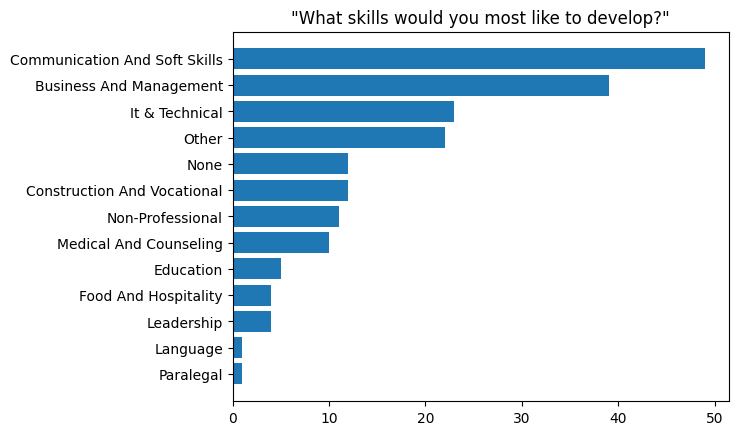

In [440]:
import matplotlib.pyplot as plt 
plt.barh(y=v['Skill Category'], width=v['count'])
plt.title('"What skills would you most like to develop?"')
# plt.xticks(rotation=90)
plt.gca().invert_yaxis()  # Invert the y-axis to start with the highest count at the top
plt.show()

---

#### Cleaning the Survey Data

In [79]:
import pandas as pd 
import os 
import numpy as np
import json
import re
from collections import Counter

fp = os.path.join('data',
      'manual_sm_exports', 
      'Delaware_Employment_Equity_Project_Community_Workforce_Campaign_Survey_V7.csv')

df = pd.read_csv(fp)

display(df.head())
df.shape

## Check duplicate columns
col_counts = [(key,value) for key, value in Counter(df.columns).items()]
[c for c in col_counts if c[1] > 1]

print("Duplicate Columns")
df.columns[df.columns.duplicated()]

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,language,...,"How well do you know the theories of group behavior, societal trends and influences, and human culture?",How well do you convey information when you speak?,How well can you analyze systems?,How well do you know the principles and methods of instruction?,How well do you understand telecom systems?,How well do you know the principles and methods used in counseling?,How well do you manage your and others' time?,How well can you identify and fix problems in machines or technology?,How well does your writing effectively communicate to an audience's particular need,Email Address:
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Response,Response,Response,Response,Response,Response,Response,Response,Response,Open-Ended Response
1,1.185240e+11,452261040.0,01/29/2024 12:51:19 PM,01/29/2024 01:02:56 PM,50.254.172.169,NaN,NaN,NaN,NaN,en,...,Skilled (Write an article about cultural diffe...,Advanced,Beginner (Manage work with a missing teammate),Basic,Beginner (Use a business phone),Skilled (Provide job counseling to the unemplo...,Skilled (Allocate staff time to projects for t...,Beginner (Identify source of leak on outside o...,Skilled (Write a memo to staff outlining new d...,tmorris@kgwcc.org
2,1.185239e+11,452261040.0,01/29/2024 10:36:37 AM,01/29/2024 10:47:25 AM,73.165.183.94,NaN,NaN,NaN,NaN,en,...,Skilled (Write an article about cultural diffe...,Skilled (Interview applicants to obtain person...,Skilled (Determine how new equipment will affe...,Skilled (Lead a quality improvement seminar),Skilled (Install a satellite TV dish),Skilled (Provide job counseling to the unemplo...,Skilled (Allocate staff time to projects for t...,Skilled (Identify the circuit causing an elect...,Skilled (Write a memo to staff outlining new d...,Ruble.Harris@freirewilmington.org
3,1.185239e+11,452261040.0,01/29/2024 10:24:19 AM,01/29/2024 10:35:04 AM,73.165.183.94,NaN,NaN,NaN,NaN,en,...,Skilled (Write an article about cultural diffe...,Skilled (Interview applicants to obtain person...,Skilled (Determine how new equipment will affe...,Skilled (Lead a quality improvement seminar),Advanced,Advanced,Skilled (Allocate staff time to projects for t...,Skilled (Identify the circuit causing an elect...,Skilled (Write a memo to staff outlining new d...,jrodstrom@dmvc.org
4,1.185234e+11,452261040.0,01/28/2024 04:12:16 PM,01/28/2024 04:33:43 PM,73.165.183.94,NaN,NaN,NaN,NaN,en,...,Advanced,Skilled (Interview applicants to obtain person...,Advanced,Advanced,Basic,Skilled (Provide job counseling to the unemplo...,Skilled (Allocate staff time to projects for t...,Basic,Skilled (Write a memo to staff outlining new d...,Conavariety@gmail.com


Duplicate Columns


Index([], dtype='object')

#### Clean the column names by column type 
* Metadata column - column with information from SurveyMonkey about the response 
* Survey Columns 
    * Skills survey column - column that's a question ported from the career onestop skills survey
    * Social Contract columns - column that's a question about the respondent (supplied by Social Contract)

In [80]:
## Metadata columns 
metadata_columns = list(df.loc[:, :'total_time'].columns)
print(f"Metadata Columns: {metadata_columns}")
print('Dropping Columns with all NaNs')
all_nan_columns = list(df[metadata_columns].columns[df[metadata_columns].isna().sum() == df.shape[0]])
print(f'Dropping rq_flag (all {df["rq_flag"].unique()[0],df["rq_flag"].unique()[-1]})')
metadata_columns = [col for col in metadata_columns if col not in all_nan_columns + ['rq_flag']]

# display('Metadata Columns')
# display(metadata_columns)

## Skills matcher columns 
skills_matcher_start = df.columns.get_loc('How much do you know about business planning and leadership?')
skills_matcher_columns = list(df.columns[skills_matcher_start:])
# display(skills_matcher_columns)

## Social Contract columns (respondent demographic questions)
SC_columns = list(df.drop(metadata_columns + all_nan_columns + ['rq_flag'] +  skills_matcher_columns, axis=1).columns)
# display(SC_columns)

Metadata Columns: ['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address', 'Email Address', 'First Name', 'Last Name', 'Custom Data 1', 'language', 'rq_flag', 'total_time']
Dropping Columns with all NaNs
Dropping rq_flag (all (nan, 0.0))


Clean left side of file separately (metadata + SC columns)

In [81]:
df_non_skills_matcher = df[metadata_columns  + SC_columns]
display(df_non_skills_matcher.head())
display(df_non_skills_matcher.shape)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,language,total_time,How did you learn about the survey?,Unnamed: 13,Are you taking this survey online or in person?,...,Unnamed: 91,Unnamed: 92,How do people in your community usually hear about job opportunities?,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Response,"Other (please specify event name, if applicable)",Response,...,Transportation,Other (please specify),Word of mouth,Online job site,Delaware JobLink,Job Fairs,Employer websites,Temp Agency,I don't know,Other (please specify)
1,1.185240e+11,452261040.0,01/29/2024 12:51:19 PM,01/29/2024 01:02:56 PM,50.254.172.169,en,697.0,Ci'Aira,NaN,In person,...,NaN,NaN,NaN,Online job site,NaN,NaN,Employer websites,NaN,NaN,NaN
2,1.185239e+11,452261040.0,01/29/2024 10:36:37 AM,01/29/2024 10:47:25 AM,73.165.183.94,en,648.0,Michael,NaN,In person,...,NaN,NaN,Word of mouth,NaN,Delaware JobLink,NaN,NaN,Temp Agency,NaN,NaN
3,1.185239e+11,452261040.0,01/29/2024 10:24:19 AM,01/29/2024 10:35:04 AM,73.165.183.94,en,644.0,Michael,NaN,In person,...,NaN,NaN,NaN,NaN,Delaware JobLink,NaN,NaN,NaN,NaN,NaN
4,1.185234e+11,452261040.0,01/28/2024 04:12:16 PM,01/28/2024 04:33:43 PM,73.165.183.94,en,1286.0,Michael,NaN,In person,...,Transportation,NaN,NaN,NaN,NaN,NaN,NaN,Temp Agency,NaN,NaN


(291, 96)

In [82]:
## Clean the SC_column names 
if any(col not in df_non_skills_matcher.columns for col in SC_columns): 
    pass # idempotent check (i.e. so you can re-run this cell independently of the previous)
else: 
    filled_SC_cols = []
    for col in SC_columns:
        # Named column (i.e. the current question)
        if 'Unnamed' not in col: 
            named_col = col
            question_type = df_non_skills_matcher[col].iloc[0]
            try: 
                if question_type[:4] in ('Open', 'Date'): 
                    question_type = question_type[:4]

                new_col_name = named_col + "_" + question_type
            except: 
                print(named_col, question_type)
                raise Exception
        else: 
            # Construct new column name from named column and the current unnamed column's answer value
            col_answers = df_non_skills_matcher[col].dropna().unique()

            # Each unnamed column should correspond to only one question answer, unless it's an "Other" column  
            if (len(col_answers) > 1) and (df_non_skills_matcher[col].iloc[0][:5] != 'Other'):  

                # Error 
                col_index = df_non_skills_matcher.columns.get_loc(col)
                # df_non_sm_survey_qs[col].unique()[-1]
                raise Exception(f'{(named_col, col)} at {col_index}: {list(df_non_skills_matcher[col].unique())}')
                
            else:
                # clean answer if it's "Other"
                col_answers[0] = re.sub('\s+\(.*\)', '', col_answers[0]) 
                new_col_name = f"{named_col}_{col_answers[0]}"
                
        # Save name 
        filled_SC_cols.append(new_col_name)


    # Assign to df 
    df_non_skills_matcher.columns = metadata_columns + filled_SC_cols

    # Drop the first row (used in column name now)
    df_non_skills_matcher = df_non_skills_matcher.iloc[1:, :]

display(df_non_skills_matcher.head())
display(df_non_skills_matcher.shape)
print(df_non_skills_matcher.columns)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,language,total_time,How did you learn about the survey?_Response,How did you learn about the survey?_Other,Are you taking this survey online or in person?_Response,...,What industries are people where you live primarily working in? Select up to 3._Transportation,What industries are people where you live primarily working in? Select up to 3._Other,How do people in your community usually hear about job opportunities?_Word of mouth,How do people in your community usually hear about job opportunities?_Online job site,How do people in your community usually hear about job opportunities?_Delaware JobLink,How do people in your community usually hear about job opportunities?_Job Fairs,How do people in your community usually hear about job opportunities?_Employer websites,How do people in your community usually hear about job opportunities?_Temp Agency,How do people in your community usually hear about job opportunities?_I don't know,How do people in your community usually hear about job opportunities?_Other
1,1.185240e+11,452261040.0,01/29/2024 12:51:19 PM,01/29/2024 01:02:56 PM,50.254.172.169,en,697.0,Ci'Aira,NaN,In person,...,NaN,NaN,NaN,Online job site,NaN,NaN,Employer websites,NaN,NaN,NaN
2,1.185239e+11,452261040.0,01/29/2024 10:36:37 AM,01/29/2024 10:47:25 AM,73.165.183.94,en,648.0,Michael,NaN,In person,...,NaN,NaN,Word of mouth,NaN,Delaware JobLink,NaN,NaN,Temp Agency,NaN,NaN
3,1.185239e+11,452261040.0,01/29/2024 10:24:19 AM,01/29/2024 10:35:04 AM,73.165.183.94,en,644.0,Michael,NaN,In person,...,NaN,NaN,NaN,NaN,Delaware JobLink,NaN,NaN,NaN,NaN,NaN
4,1.185234e+11,452261040.0,01/28/2024 04:12:16 PM,01/28/2024 04:33:43 PM,73.165.183.94,en,1286.0,Michael,NaN,In person,...,Transportation,NaN,NaN,NaN,NaN,NaN,NaN,Temp Agency,NaN,NaN
5,1.185215e+11,452261040.0,01/25/2024 11:51:15 AM,01/25/2024 12:13:25 PM,167.21.141.30,en,1330.0,"Other (please specify event name, if applicable)",Brad Haley,Online,...,NaN,NaN,Word of mouth,Online job site,Delaware JobLink,Job Fairs,Employer websites,Temp Agency,NaN,NaN


(290, 96)

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'language', 'total_time',
       'How did you learn about the survey?_Response',
       'How did you learn about the survey?_Other',
       'Are you taking this survey online or in person?_Response',
       'What zip code do you currently live in?_Open',
       'What is your date of birth?_Date',
       'Which of the following best describes you?_Response',
       'What is the highest level of education that you have attained?_Response',
       'Do you hold any professional certifications?_Response',
       'What certifications do you hold?_Open',
       'Are you currently employed?_Response',
       'How many jobs do you currently work at?_Response',
       'What are your current job title(s)_Open',
       'Does your current compensation cover what you need to feel financially comfortable?_Response',
       'What would it take for you to feel like you were earning enough to feel financially comforta

Certain "duplicate" columns with '.1' in their names 


In [83]:
x = df_non_skills_matcher.copy()

In [85]:
dup_cols = [col for col in filled_SC_cols if '.1' in col]
display(dup_cols) # Not real duplicate columns -- SM separates them from their originals based on answer order 

df_non_skills_matcher = x.copy()
for col_name in dup_cols:
    orig_col_name = re.sub('\.1','', col_name)
    dup_rows = df_non_skills_matcher[[col_name, orig_col_name]][df_non_skills_matcher[[col_name, orig_col_name]].isna().sum(axis=1) == 0]
    if not dup_rows.empty: # if both columns not nan
        display(dup_rows)
    else: 
        # Remove from dataframe
        df_non_skills_matcher[orig_col_name] = np.where(~df_non_skills_matcher[col_name].isna(), df_non_skills_matcher[col_name], df_non_skills_matcher[orig_col_name]) # if col_2 is not NaN, col_1 must be NaN
        df_non_skills_matcher.drop(col_name, axis=1, inplace=True)
        # Remove from col_list 
        filled_SC_cols.remove(col_name)

['What is your ideal job?.1_Open',
 'What are some barriers that you feel you face to achieving your ideal job?.1_Lack of childcare',
 'What are some barriers that you feel you face to achieving your ideal job?.1_Transportation challenges',
 'What are some barriers that you feel you face to achieving your ideal job?.1_Criminal history',
 'What are some barriers that you feel you face to achieving your ideal job?.1_Lack of trainings/skills set',
 'What are some barriers that you feel you face to achieving your ideal job?.1_Social emotional skills',
 'What are some barriers that you feel you face to achieving your ideal job?.1_Other']

#### Four Social Contract question column types: 
* 'Response' - contains multiple MC responses 
* 'Other' - contains "other" free response answer to a MC question 
* 'Open' - free response, dedicated question
* '<Answer\>' - column devoted to a single MC answer 

In [14]:
# Break filled SC cols by column type  
response_cols = [col for col in filled_SC_cols if col.split('_')[-1] == 'Response']
other_cols = [col for col in filled_SC_cols if col.split('_')[-1] == 'Other']
open_cols = [col for col in filled_SC_cols if col.split('_')[-1] == 'Open']
ans_cols = [col for col in filled_SC_cols if not any(q_type in col for q_type in ('Response', 'Other', 'Open', 'Date'))]

# Note odd duplicate columns for the "barrier" ans_cols -- we will end up consolidating these (along with the matching "Other" column)
ans_cols

['Where are you looking for another job?_Word of mouth',
 'Where are you looking for another job?_Online job site',
 'Where are you looking for another job?_Delaware JobLink',
 'Where are you looking for another job?_Job Fairs',
 'Where are you looking for another job?_Employer websites',
 'Where are you looking for another job?_Temp Agency',
 'What are some barriers that you feel you face to achieving your ideal job?_Lack of childcare',
 'What are some barriers that you feel you face to achieving your ideal job?_Transportation challenges',
 'What are some barriers that you feel you face to achieving your ideal job?_Criminal history',
 'What are some barriers that you feel you face to achieving your ideal job?_Lack of trainings/skills set',
 'What are some barriers that you feel you face to achieving your ideal job?_Social emotional skills',
 'What are some barriers that you feel you face to achieving your ideal job?.1_Lack of childcare',
 'What are some barriers that you feel you face

##### * 'Other' & 'Open' - Free-Response Questions

Each of the following free-response question columns matches up to a "_Response" column. 

**Other**

We will manually group the free-text responses for three of these into broader categories and join it with its respective "_Response" column.
* What are some barriers that you feel you face to achieving your ideal job?
* What industries are people where you live primarily working in? Select up to 3.?
Why are you looking for another job?

In [15]:
n_responses = df_non_skills_matcher.shape[0]

print('("Other") Free-Response questions (with N non-nan answers)')
df_non_skills_matcher[other_cols]\
 .isna().sum()\
 .apply(lambda x: n_responses - x)\
 .sort_values(ascending=False)

("Other")Free-Response questions (with N non-nan answers)


What are some barriers that you feel you face to achieving your ideal job?_Other         78
How did you learn about the survey?_Other                                                53
What industries are people where you live primarily working in? Select up to 3._Other    32
What are some barriers that you feel you face to achieving your ideal job?.1_Other       29
Why are you looking for another job?_Other                                               14
Where are you looking for another job?_Other                                              7
How do people in your community usually hear about job opportunities?_Other               6
In what industry was your last job?_Other                                                 5
dtype: int64

In [16]:

print('("Open") Free-Response questions (with N non-nan answers)')
df_non_skills_matcher[open_cols]\
 .isna().sum()\
 .apply(lambda x: n_responses - x)\
 .sort_values(ascending=False)

("Open") Free-Response questions (with N non-nan answers)


What zip code do you currently live in?_Open                                                             284
What skills would you most like to develop?_Open                                                         210
What are your current job title(s)_Open                                                                  205
What is your ideal job?_Open                                                                             194
What would it take for you to feel like you were earning enough to feel financially comfortable?_Open    127
What certifications do you hold?_Open                                                                    106
Where did you participate in a workforce or employment training program?_Open                             79
What skills did you obtain at the program?_Open                                                           76
What is your ideal job?.1_Open                                                                            67
How do you think th

What is your ideal job?


In [27]:
df_non_skills_matcher[['What is your ideal job?.1_Open','What is your ideal job?_Open']][df_non_skills_matcher[['What is your ideal job?.1_Open','What is your ideal job?_Open']].isna().sum(axis=1)==0]

,What is your ideal job?.1_Open,What is your ideal job?_Open


##### * 'Response' - contains multiple MC responses 

In [488]:
df_non_skills_matcher[response_cols].head()

,How did you learn about the survey?_Response,Are you taking this survey online or in person?_Response,Which of the following best describes you?_Response,What is the highest level of education that you have attained?_Response,Do you hold any professional certifications?_Response,Are you currently employed?_Response,How many jobs do you currently work at?_Response,Does your current compensation cover what you need to feel financially comfortable?_Response,Are you currently looking for another job?_Response,Why are you looking for another job?_Response,...,Are you currently receiving unemployment benefits?_Response,Have you applied for unemployment benefits?_Response,Have you ever been rejected for unemployment benefits?_Response,Have you ever been employed at a full time or part time job?_Response,In what industry was your last job?_Response,Would you like to be employed?_Response,Have you ever participated in a workforce or employment training program?_Response,Have the skills you obtained been useful to you?_Response,Would you be interested in participating in a job training program now?_Response,"Where you live, would you say there are job opportunities for people with your experience and interests?_Response"
1,Ci'Aira,In person,Black or African American,Bachelor's degree,Yes,Yes,2,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,Yes
2,Michael,In person,Black or African American,Associate's degree,No,Yes,1,Yes,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,Yes
3,Michael,In person,White or Caucasian,"Some college, no degree",No,Yes,1,Yes,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,Yes
4,Michael,In person,Black or African American,High school diploma,Yes,Yes,1,Yes,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes
5,"Other (please specify event name, if applicable)",Online,Multiracial or Biracial,GED,No,Yes,1,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,Yes



The only changes we'll make to these columns will be to consolidate the ones which have matching "Other" columns 
* We will need to create categories for the "Other" free-form responses first 

In [489]:
for col in response_cols: 
    unique_vals = df_non_skills_matcher[col].unique()
    if any('Other' in str(val) for val in unique_vals): 
        display(df_non_skills_matcher.value_counts(col))

How did you learn about the survey?_Response
Kim                                                 64
Michael                                             58
Other (please specify event name, if applicable)    53
Jabrielle                                           43
Sade'                                               38
Ci'Aira                                             32
Name: count, dtype: int64

Why are you looking for another job?_Response
Looking for higher pay                  45
Looking for professional advancement    20
Other (please specify)                  14
Family circumstances                     5
Want to work in a new industry           4
Name: count, dtype: int64

In what industry was your last job?_Response
Food and beverage         15
Health care               11
Education                 10
Manufacturing              5
Other (please specify)     5
Construction               4
Hospitality                3
Transportation             3
Agriculture                1
Entertainment              1
Finance                    1
Name: count, dtype: int64


#### 'Open-Ended' - contains free-form written responses 


#### '<Answer\>' - column devoted to a single MC answer 


In [503]:
ans_cols_questions = list(dict.fromkeys([col.split('_')[0] for col in ans_cols]))
ans_cols_questions

['Where are you looking for another job?',
 'What are some barriers that you feel you face to achieving your ideal job?',
 'What natural talents do you think that you possess?',
 'What industries are people where you live primarily working in? Select up to 3.',
 'How do people in your community usually hear about job opportunities?']

##### Check if the barrier columns have duplicates betweeen them

In [504]:
## Reset the answer and other columns 
ans_cols = [col for col in df_non_skills_matcher.columns if not any(q_type in col for q_type in ('Response', 'Other', 'Open', 'Date')) and col not in metadata_columns]
other_cols = [col for col in df_non_skills_matcher.columns if col.split('_')[-1] == 'Other']

Like with the "Response" columns, we need to match the "Other" categories we made with the matching "Answer" columns  

In [509]:
'(' + '|'.join(ans_cols_questions) + ')_Other'

'(Where are you looking for another job?|What are some barriers that you feel you face to achieving your ideal job?|What natural talents do you think that you possess?|What industries are people where you live primarily working in? Select up to 3.|How do people in your community usually hear about job opportunities?)_Other'

**Two Schemas for dealing with Answer columns** 
* 1.) Replace answers with 1/0
* 2.) Collapse each group of answer columns by question into a list  

In [292]:
# Schema 1
df_non_skills_matcher_S1 = df_non_skills_matcher.copy()
df_non_skills_matcher_S1[ans_cols] = df_non_skills_matcher[ans_cols].fillna(0).apply(lambda row: [1 if x != 0 else 0 for x in row.values])

# Schema 2
df_non_skills_matcher_S2 = df_non_skills_matcher.copy()
ans_cols_questions = list(dict.fromkeys([col.split('_')[0] for col in ans_cols]))

def collapse_by_question(row): 
 
    row_dict = { # keys are from ans_cols_questions

    'Where are you looking for another job?':[], 
    'What are some barriers that you feel you face to achieving your ideal job?':[],
    'What natural talents do you think that you possess?':[],
    'What industries are people where you live primarily working in? Select up to 3.':[],
    'How do people in your community usually hear about job opportunities?':[], 

    }
    for col, val in row.items():
        cur_q = col.split('_')[0]
        if isinstance(val, str): # i.e. not nan:
            row_dict[cur_q].append(val)

    return pd.Series(row_dict) 

df_non_skills_matcher_S2[ans_cols_questions] = df_non_skills_matcher_S2[ans_cols].apply(collapse_by_question, axis=1)
# drop original columns 
df_non_skills_matcher_S2.drop(ans_cols, axis=1, inplace=True)


display(df_non_skills_matcher_S1.head(), df_non_skills_matcher_S1.shape)
display(df_non_skills_matcher_S2.head(), df_non_skills_matcher_S2.shape)


,Respondent ID,Collector ID,Start Date,End Date,IP Address,language,total_time,How did you learn about the survey?_Response,How did you learn about the survey?_Other,Are you taking this survey online or in person?_Response,...,What industries are people where you live primarily working in? Select up to 3._Transportation,What industries are people where you live primarily working in? Select up to 3._Other,How do people in your community usually hear about job opportunities?_Word of mouth,How do people in your community usually hear about job opportunities?_Online job site,How do people in your community usually hear about job opportunities?_Delaware JobLink,How do people in your community usually hear about job opportunities?_Job Fairs,How do people in your community usually hear about job opportunities?_Employer websites,How do people in your community usually hear about job opportunities?_Temp Agency,How do people in your community usually hear about job opportunities?_I don't know,How do people in your community usually hear about job opportunities?_Other
1,1.185240e+11,452261040.0,01/29/2024 12:51:19 PM,01/29/2024 01:02:56 PM,50.254.172.169,en,697.0,Ci'Aira,NaN,In person,...,0,NaN,0,1,0,0,1,0,0,NaN
2,1.185239e+11,452261040.0,01/29/2024 10:36:37 AM,01/29/2024 10:47:25 AM,73.165.183.94,en,648.0,Michael,NaN,In person,...,0,NaN,1,0,1,0,0,1,0,NaN
3,1.185239e+11,452261040.0,01/29/2024 10:24:19 AM,01/29/2024 10:35:04 AM,73.165.183.94,en,644.0,Michael,NaN,In person,...,0,NaN,0,0,1,0,0,0,0,NaN
4,1.185234e+11,452261040.0,01/28/2024 04:12:16 PM,01/28/2024 04:33:43 PM,73.165.183.94,en,1286.0,Michael,NaN,In person,...,1,NaN,0,0,0,0,0,1,0,NaN
5,1.185215e+11,452261040.0,01/25/2024 11:51:15 AM,01/25/2024 12:13:25 PM,167.21.141.30,en,1330.0,"Other (please specify event name, if applicable)",Brad Haley,Online,...,0,NaN,1,1,1,1,1,1,0,NaN


(290, 91)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,language,total_time,How did you learn about the survey?_Response,How did you learn about the survey?_Other,Are you taking this survey online or in person?_Response,...,Would you be interested in participating in a job training program now?_Response,What skills would you most like to develop?_Open,"Where you live, would you say there are job opportunities for people with your experience and interests?_Response",What industries are people where you live primarily working in? Select up to 3._Other,How do people in your community usually hear about job opportunities?_Other,Where are you looking for another job?,What are some barriers that you feel you face to achieving your ideal job?,What natural talents do you think that you possess?,What industries are people where you live primarily working in? Select up to 3.,How do people in your community usually hear about job opportunities?
1,1.185240e+11,452261040.0,01/29/2024 12:51:19 PM,01/29/2024 01:02:56 PM,50.254.172.169,en,697.0,Ci'Aira,NaN,In person,...,No,"Prioritizing, organization",Yes,NaN,NaN,[],[],[],"[Computers and technology, Education, Health c...","[Online job site, Employer websites]"
2,1.185239e+11,452261040.0,01/29/2024 10:36:37 AM,01/29/2024 10:47:25 AM,73.165.183.94,en,648.0,Michael,NaN,In person,...,No,I could teach some things I have learned,Yes,NaN,NaN,[],[],[],"[Construction, Education, Hospitality]","[Word of mouth, Delaware JobLink, Temp Agency]"
3,1.185239e+11,452261040.0,01/29/2024 10:24:19 AM,01/29/2024 10:35:04 AM,73.165.183.94,en,644.0,Michael,NaN,In person,...,No,Believe I have enough,Yes,NaN,NaN,[],[],[],"[Computers and technology, Education, Pharmace...",[Delaware JobLink]
4,1.185234e+11,452261040.0,01/28/2024 04:12:16 PM,01/28/2024 04:33:43 PM,73.165.183.94,en,1286.0,Michael,NaN,In person,...,Yes,Just more of the business structure of things ...,Yes,NaN,NaN,[],[Lack of trainings/skills set],[],"[Education, Food and beverage, Health care, Tr...",[Temp Agency]
5,1.185215e+11,452261040.0,01/25/2024 11:51:15 AM,01/25/2024 12:13:25 PM,167.21.141.30,en,1330.0,"Other (please specify event name, if applicable)",Brad Haley,Online,...,Yes,Computer Skills,Yes,NaN,NaN,[],[Lack of trainings/skills set],[],"[Computers and technology, Education, Energy, ...","[Word of mouth, Online job site, Delaware JobL..."


(290, 55)

In [ ]:
df_non_skills_matcher.filter(regex='|'.join(ans_cols_questions)).columns

In [ ]:
## barrier responses 
barrier_cols = list(df_non_skills_matcher.filter(regex='barrier').columns)
df_barriers = df_non_skills_matcher[metadata_columns + barrier_cols]
print(df_barriers.columns)

## Combine the columns 
barrier_q = 'What are some barriers that you feel you face to achieving your ideal job?'
ans_cats = list(dict.fromkeys([col.split('_')[1] for col in barrier_cols if 'Other' not in col]))
for cat in ans_cats: 
    df_barriers[f'{barrier_q}_{cat}'] = df_barriers[f'{barrier_q}.1_{cat}'] 
    df_barriers.drop(f'{barrier_q}.1_{cat}', axis=1, inplace=True)

# Create count version of Other
df_barriers[f'{barrier_q}_Other_Count'] = np.where(df_barriers[f'{barrier_q}_Other'].isna(), 0, 1)

In [ ]:
## Manually group other cats 
os.makedirs('open_ended', exist_ok = True)
df_barrier_other = df_barriers[['Respondent ID', f'{barrier_q}_Other']]
df_barrier_other['barrier_cat'] = ''
df_barrier_other.dropna().to_csv(os.path.join('open_ended', barrier_q + '.csv'))

## After manually grouping into categories 

df_barrier_other_cats = pd.read_csv(os.path.join('open_ended', 'What are some barriers that you feel you face to achieving your ideal job?_manual.csv'), index_col=0)
df_barrier_other_cats['barrier_cat'] = df_barrier_other_cats['barrier_cat'].str.strip()

df_barrier_other_cats['barrier_cat'].value_counts()
df_barrier_other_cats

/var/folders/qy/qp1k23kj0jj0bpkn10sx9mhh0000gn/T/ipykernel_90012/4273837261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barrier_other['barrier_cat'] = ''


,Respondent ID,What are some barriers that you feel you face to achieving your ideal job?_Other,barrier_cat
1,1.185240e+11,No Barriers,No Barriers
2,1.185239e+11,Political Barriers,Social Barriers
3,1.185239e+11,Non at all,No Barriers
8,1.185215e+11,Physical Ability,Personal Barriers
9,1.185214e+11,Age and Connections,Age
...,...,...,...
270,1.184192e+11,Capital,Lack of Resources
273,1.184176e+11,Limited Opportunities for advancement,Lack of Opportunities
276,1.184174e+11,DEGREE,Lack of Education
277,1.184172e+11,pathway to take in colleges that could land me...,Lack of Education


In [ ]:
## Join manual groupings back to the rest 
df_barriers = df_barriers.merge(df_barrier_other_cats.set_index(['Respondent ID'])['barrier_cat'], how='left', left_on='Respondent ID', right_index=True)

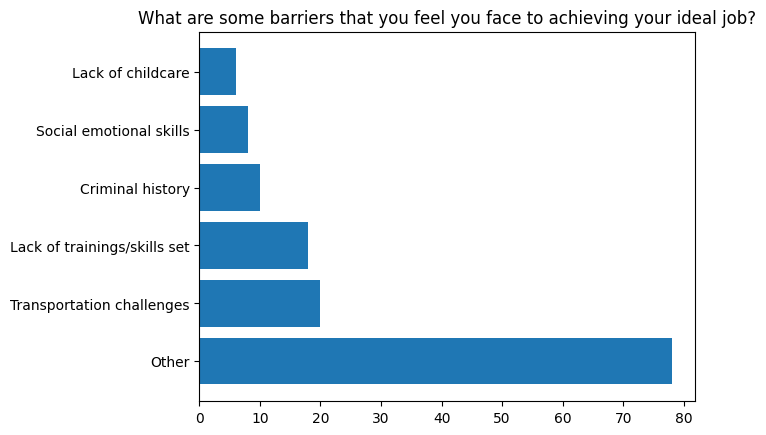

,What are some barriers that you feel you face to achieving your ideal job?,count
5,Other,78
1,Transportation challenges,20
3,Lack of trainings/skills set,18
2,Criminal history,10
4,Social emotional skills,8
0,Lack of childcare,6


140 of 290 respondents (48.28%) cited barriers.


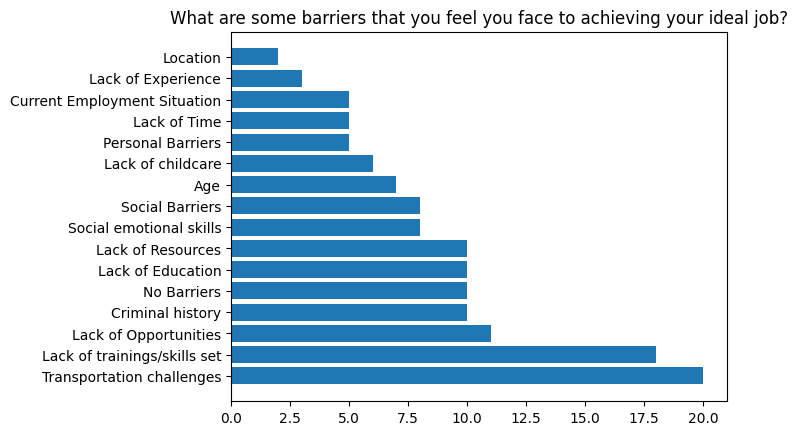

,What are some barriers that you feel you face to achieving your ideal job?,count
1,Transportation challenges,20
3,Lack of trainings/skills set,18
0,Lack of Opportunities,11
2,Criminal history,10
1,No Barriers,10
2,Lack of Education,10
3,Lack of Resources,10
4,Social emotional skills,8
4,Social Barriers,8
5,Age,7


In [ ]:

## Barriers bar chart (Other as discrete binary)
import matplotlib.pyplot as plt
df_barriers_discrete = df_barriers[[f'{barrier_q}_{cat}' for cat in ans_cats + ['Other_Count']]].sum().reset_index()
df_barriers_discrete.columns = [barrier_q, 'count']
df_barriers_discrete[barrier_q] = df_barriers_discrete[barrier_q].str.lstrip(barrier_q + '_').replace({'Other_Count':'Other'})
df_barriers_discrete.sort_values('count', ascending=False, inplace=True)

plt.barh(df_barriers_discrete[barrier_q], df_barriers_discrete['count'])
plt.title(barrier_q)
plt.show()
display(df_barriers_discrete)

num, denom = df_barriers_discrete["count"].sum(), df_barriers.shape[0]
print(f'{num} of {denom} respondents ({num / denom:.2%}) cited barriers.') 

## Barriers bar chart (Other as disambiguated)
# df_barriers.merge(df_barrier_other_cats.set_index(['Respondent ID'])['barrier_cat'], how='left', left_on='Respondent ID', right_index=True)
df_barriers_disambig = df_barriers_discrete[df_barriers_discrete[barrier_q] != 'Other']
df_barriers_barrier_cats = df_barriers['barrier_cat'].value_counts().reset_index().rename({'barrier_cat':barrier_q}, axis=1)
df_barriers_disambig = pd.concat((df_barriers_disambig, df_barriers_barrier_cats), axis=0).sort_values('count', ascending=False)


plt.barh(df_barriers_disambig[barrier_q], df_barriers_disambig['count'])
plt.title(barrier_q)
plt.show()
display(df_barriers_disambig)


In [ ]:
df_barriers['barrier_cat'].value_counts().reset_index()

,barrier_cat,count
0,Lack of Opportunities,11
1,No Barriers,10
2,Lack of Education,10
3,Lack of Resources,10
4,Social Barriers,8
5,Age,7
6,Personal Barriers,5
7,Lack of Time,5
8,Current Employment Situation,5
9,Lack of Experience,3


In [ ]:
os.makedirs('open_ended', exist_ok = True)
df_barrier_other = df_barriers[['Respondent ID', f'{barrier_q}_Other']]
df_barrier_other['barrier_cat'] = ''
df_barrier_other.dropna().to_csv(os.path.join('open_ended', barrier_q + '.csv'))

/var/folders/qy/qp1k23kj0jj0bpkn10sx9mhh0000gn/T/ipykernel_90012/2559921241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barrier_other['barrier_cat'] = ''


In [ ]:
df_barrier_other_cats[df_barrier_other_cats['barrier_cat'] == 'Lack']

,Respondent ID,What are some barriers that you feel you face to achieving your ideal job?_Other,barrier_cat
72,1.184836e+11,Clientele/ equipment,Lack


In [ ]:
df_barrier_qs = df_non_sm_survey_qs.filter(regex='barrier').fillna(0).applymap(lambda x: x if str(x).isnumeric() else 1)

df_barrier_sum = df_barrier_qs.sum().sort_values(ascending=False)
df_barrier_sum.index = [idx.split('_')[-1] for idx in df_barrier_sum.index]


df_barrier_sum

Other                           78
Lack of trainings/skills set    70
Other                           29
Transportation challenges       24
Social emotional skills         20
Transportation challenges       20
Lack of trainings/skills set    18
Lack of childcare               13
Criminal history                13
Criminal history                10
Social emotional skills          8
Lack of childcare                6
dtype: int64

In [ ]:
df_barrier_qs.columns

Index(['What are some barriers that you feel you face to achieving your ideal job?_Lack of childcare',
       'What are some barriers that you feel you face to achieving your ideal job?_Transportation challenges',
       'What are some barriers that you feel you face to achieving your ideal job?_Criminal history',
       'What are some barriers that you feel you face to achieving your ideal job?_Lack of trainings/skills set',
       'What are some barriers that you feel you face to achieving your ideal job?_Social emotional skills',
       'What are some barriers that you feel you face to achieving your ideal job?_Other',
       'What are some barriers that you feel you face to achieving your ideal job?.1_Lack of childcare',
       'What are some barriers that you feel you face to achieving your ideal job?.1_Transportation challenges',
       'What are some barriers that you feel you face to achieving your ideal job?.1_Criminal history',
       'What are some barriers that you feel you